In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Relajar(V,nx,ny):
    for i in range(1,nx-1):
        for j in range(1,ny-1):

            V[i,j]= (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1] )/(4.0)

In [4]:
##  TAMAÑO DE LA GRILLA
Nx, Ny = 50,100

## AHORA LA GRILLA CON LAS CONDICIONES DE CONTORNO
## ESTA MATRIZ REPRESENA EL EL POTENCIAL EN TODO EL ESPACIO, POR ESO INCLUYE YA LAS
## CONDICIONES DE CONTORNO

v0 = 1000
V = np.zeros((Nx,Ny))

V[0,0:30] =   -v0    ## VOLTIOS
V[0,70:] =   v0
V[-1,0:30] =  -v0   ## VOLTIOS
V[-1,70:] =  v0

#for i in range(Nx):
V[0:100,0] = -v0
V[0:100,-1] =v0



In [5]:
## ENTONCES AHORA ITERAMOS SOBRE LA GRILLA V Y ACTUALIZAMOS EL VALOR DEL POTENCIAL
iteraciones = 100
for i in range(iteraciones):
    Relajar(V,Nx,Ny)

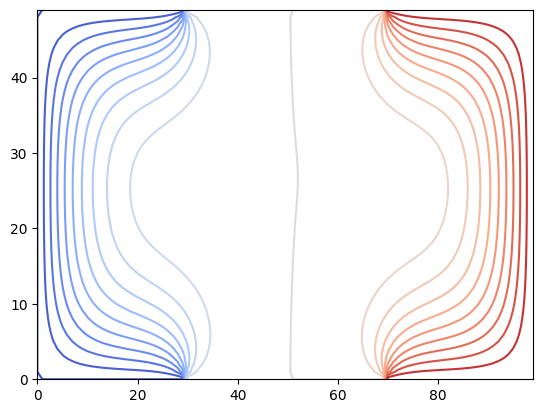

In [6]:
V_eq = np.arange(-v0,v0, 100)
fig , ax = plt.subplots()

contour = ax.contour(V, V_eq, cmap="coolwarm", vmin = -v0, vmax=v0)
#plt.imshow(V)
ax.set_title = " Equipotenciales"
plt.show()


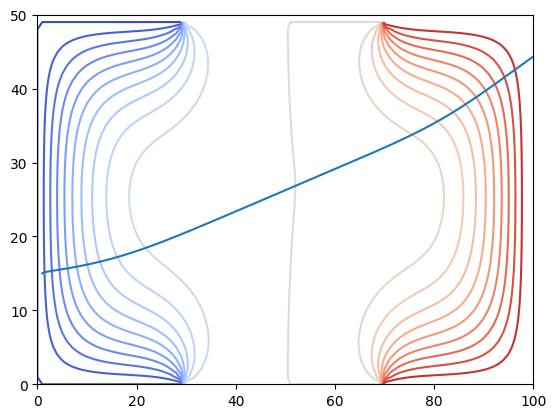

100.01711030016827

In [7]:
## AHORA SIMULAREMOS EL ELECTRÓN A TRAVZ DEL LENTE


## CALCULO EL CAMPO POR DIFERENCIA FINITA
Ex = np.zeros(V.shape)
Ey = np.zeros(V.shape)    
for i in range(1,Nx-1):
    for j in range(1,Ny-1):
        Ex[i,j] = -(V[i+1, j] - V[i-1, j]) / 2.
        Ey[i,j] =-(V[i, j+1] - V[i, j-1]) / 2.


def Fuerza(x,y):
    q = -1.6e-19 # Culomb
    m = 9.1e-31 # kg

    ax = Ex[x,y]*(q/m)
    ay = Ey[x,y]*(q/m)

    return ax,ay
##  TAMAÑO DE LA GRILLA
Nx, Ny = 50,100

# Carga electron en culombs
dt = 1e-9
x = 15 #pos inicial
y = 1
var_x = x
var_y = y
# velocidades iniciales
vx = 5e5
vy = 0

X = []
Y = []
W = []
Z = []

#for n in range(1000):
while  y < 100 and x < 50:   
    ax , ay = Fuerza(x,y)

    var_x += vx*dt #+ 0.5*ax*dt*dt
    var_y += vy*dt #+ 0.5*ay*dt*dt
    vx += ax*dt
    vy += ay*dt
    x = int(var_x)
    y = int(var_y)
    #print(vx,vy)
    #print(var_x,var_y)
    #print(x,y)
    W.append(var_x)
    Z.append(var_y)
    X.append(x)
    Y.append(y)
    

fig , ax = plt.subplots()
ax.contour(V, V_eq, cmap="coolwarm", vmin = -v0, vmax=v0)
#ax.plot(Y,X,"*")
ax.plot(Z,W)
ax.set_xlim(0,Ny)
ax.set_ylim(0,Nx)
plt.show()

#POSICION VERTICAL INICIAL SI EL 0 ESTA UBICADO EN 25
y0 = Z[0]
# POSICION VERTICAL FINAL REDONDEADA AL ENTERO MAS CERCANO CON EL 0 EN 25
yf = Z[-1]
# POR LO TANTO LA MAGNIFICACION ES ~ 100 ( CON LOS PARAMETROS IMPUESTOS EN ESTE EJERCICIO )
yf/y0
